In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [3]:
#글씨설정
plt.rc("font",family="Malgun Gothic")
sns.set(font="Margun Gothic",rc={"axes.unicode_minus":False},style='darkgrid')
mpl.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#맷플롯립 한글 설정
font_path = r'C:\Users\dudtj\OneDrive\Desktop\금융데이터\NanumFontSetup_TTF_ALL'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [4]:
#matplotlib 패키지 한글 깨짐 처리 시작
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [5]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\금융데이터\금융보안원_경진대회_데이터(최종제출)1.csv',encoding='euc-kr')

In [6]:
#매출금액 단위 만원으로 변환 
data['매출금액'] = data['매출금액']/10000
data.rename(columns={'매출금액' : '매출금액(단위:만원)'}, inplace=True)
#매출 건수 한 건당 매출금액 컬럼 추가
data['건당 매출금액(단위:만원)'] = data['매출금액(단위:만원)']/data['매출건수']

In [7]:
data_j = data[data['품목대분류명'] == '전자']

In [8]:
data_j['성별'].value_counts()

여성    19415
남성    14033
Name: 성별, dtype: int64

In [9]:
data_j['성별'].groupby(data_j['품목중분류명']).value_counts()

품목중분류명  성별
가전      여성     7691
        남성     4573
디지털     여성    11724
        남성     9460
Name: 성별, dtype: int64

<AxesSubplot:xlabel='기준년월', ylabel='count'>

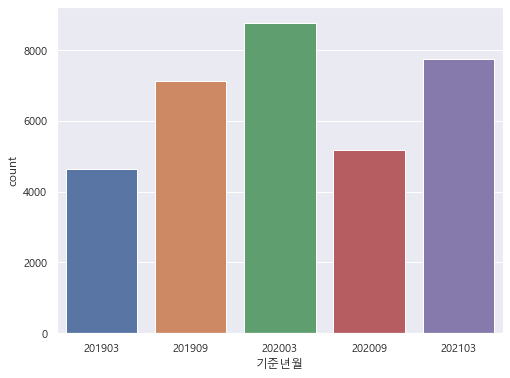

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
sns.countplot(x = '기준년월', data = data_j)

In [ ]:
data_df = pd.DataFrame(data_j)

In [15]:
#월별 barplot
def get_barplot_C_M(category):
    dfLC = data_df[['기준년월', '품목대분류명','품목중분류명','매출건수']]
    dfLC_bar = dfLC[dfLC['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    sns.barplot(x = '품목중분류명', y = '매출건수', hue = '기준년월', data = dfLC_bar, edgecolor = 'black')

def get_barplot_M_M(category):
    dfLM = data_df[['기준년월', '품목대분류명','품목중분류명','매출금액(단위:만원)']]
    dfLM_bar = dfLM[dfLM['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    sns.barplot(x = '품목중분류명', y = '매출금액(단위:만원)', hue = '기준년월', data = dfLM_bar, edgecolor = 'black')
def get_barplot_CM_M(category):
    dfCM = data_df[['기준년월', '품목대분류명', '품목중분류명','건당 매출금액(단위:만원)']]
    dfCM_bar = dfCM[dfCM['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    sns.barplot(x = '품목중분류명', y = '건당 매출금액(단위:만원)', hue = '기준년월', data = dfCM_bar, edgecolor = 'black')

<AxesSubplot:xlabel='품목중분류명', ylabel='건당 매출금액(단위:만원)'>

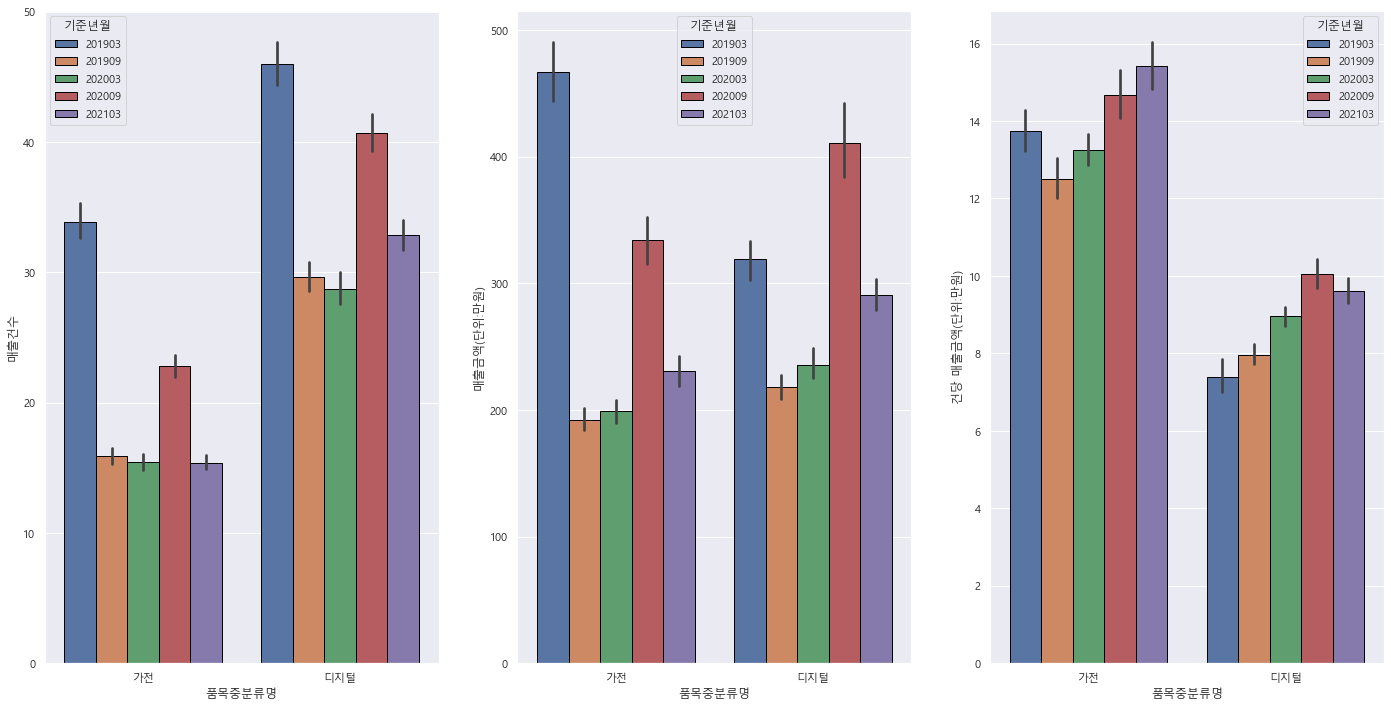

In [18]:
figure,((ax1,ax2,ax3))=plt.subplots(nrows=1,ncols=3)
figure.set_size_inches(24,12)
dfLC = data_df[['기준년월', '품목대분류명','품목중분류명','매출건수']]
dfLC_bar = dfLC[dfLC['품목대분류명'] == '전자']
sns.barplot(x = '품목중분류명', y = '매출건수', hue = '기준년월', data = dfLC_bar, edgecolor = 'black',ax=ax1)

dfLM = data_df[['기준년월', '품목대분류명','품목중분류명','매출금액(단위:만원)']]
dfLM_bar = dfLM[dfLM['품목대분류명'] =='전자']

sns.barplot(x = '품목중분류명', y = '매출금액(단위:만원)', hue = '기준년월', data = dfLM_bar, edgecolor = 'black',ax=ax2)
dfCM = data_df[['기준년월', '품목대분류명', '품목중분류명','건당 매출금액(단위:만원)']]
dfCM_bar = dfCM[dfCM['품목대분류명'] == '전자']
sns.barplot(x = '품목중분류명', y = '건당 매출금액(단위:만원)', hue = '기준년월', data = dfCM_bar, edgecolor = 'black',ax=ax3)

In [ ]:
#매출건수 baplot
#get_barplot_C_M('전자')

#매출금액 barplot
#get_barplot_M_M('전자')

#건당 매출금액 평균 barplot
#get_barplot_CM_M('전자')

In [ ]:
#성별 barplot
def get_barplot_C_S(category):
    dfLC = data_df[['기준년월', '품목대분류명', '성별','품목중분류명','매출건수']]
    dfLC_bar = dfLC[dfLC['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (4, 3))
    sns.barplot(x = '품목중분류명', y = '매출건수', hue = '성별', data = dfLC_bar, edgecolor = 'black')

def get_barplot_M_S(category):
    dfLM = data_df[['기준년월', '품목대분류명','성별','품목중분류명','매출금액(단위:만원)']]
    dfLM_bar = dfLM[dfLM['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (4, 3))
    sns.barplot(x = '품목중분류명', y = '매출금액(단위:만원)', hue = '성별', data = dfLM_bar, edgecolor = 'black')

def get_barplot_CM_S(category):
    dfCM = data_df[['기준년월', '품목대분류명', '품목중분류명', '성별', '건당 매출금액(단위:만원)']]
    dfCM_bar = dfCM[dfCM['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (4, 3))
    sns.barplot(x = '품목중분류명', y = '건당 매출금액(단위:만원)', hue = '성별', data = dfCM_bar, edgecolor = 'black')

<AxesSubplot:xlabel='품목중분류명', ylabel='건당 매출금액(단위:만원)'>

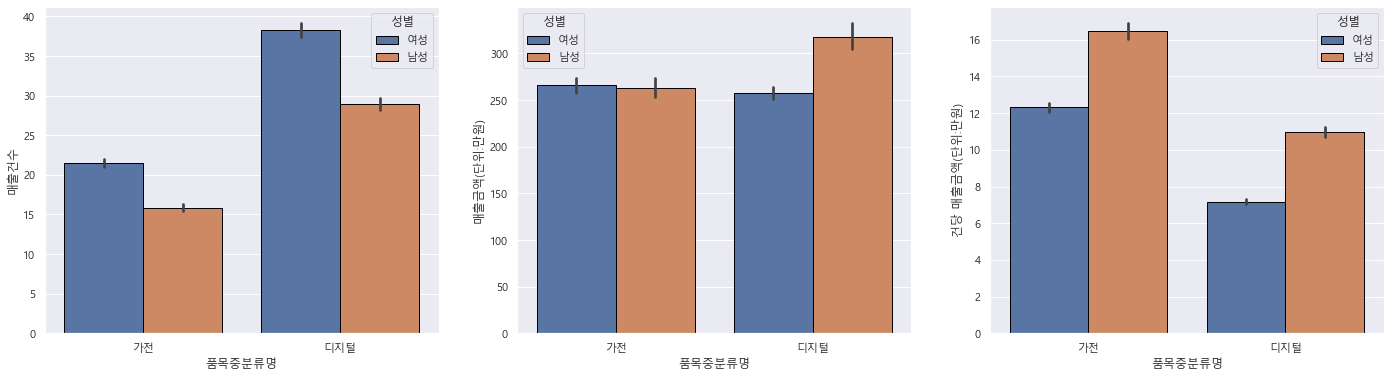

In [19]:
figure,((ax1,ax2,ax3))=plt.subplots(nrows=1,ncols=3)
figure.set_size_inches(24,6)
dfLC = data_df[['기준년월', '품목대분류명', '성별','품목중분류명','매출건수']]
dfLC_bar = dfLC[dfLC['품목대분류명'] == '전자']
sns.barplot(x = '품목중분류명', y = '매출건수', hue = '성별', data = dfLC_bar, edgecolor = 'black',ax=ax1)
dfLM = data_df[['기준년월', '품목대분류명','성별','품목중분류명','매출금액(단위:만원)']]
dfLM_bar = dfLM[dfLM['품목대분류명'] =='전자']
sns.barplot(x = '품목중분류명', y = '매출금액(단위:만원)', hue = '성별', data = dfLM_bar, edgecolor = 'black',ax=ax2)
dfCM = data_df[['기준년월', '품목대분류명', '품목중분류명', '성별', '건당 매출금액(단위:만원)']]
dfCM_bar = dfCM[dfCM['품목대분류명'] == '전자']
sns.barplot(x = '품목중분류명', y = '건당 매출금액(단위:만원)', hue = '성별', data = dfCM_bar, edgecolor = 'black',ax=ax3)

In [ ]:
#매출건수 성별 중분류
#get_barplot_C_S('여가/스포츠')

#매출금액 성별 중분류
#get_barplot_M_S('여가/스포츠')

#건당 매출금액 성별 중분류
#get_barplot_CM_S('여가/스포츠')
#건당 매출금액은 남성이 더 높음

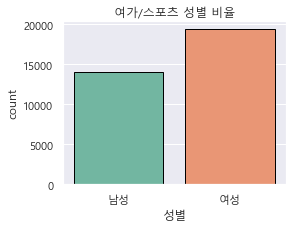

In [28]:
#여가/스포츠 성별 비율
group_names = ['남성','여성']
fig, ax = plt.subplots(1, 1, figsize = (4, 3))
sns.countplot(x = '성별', data = data_j, edgecolor= 'black', palette='Set2',order=group_names)
ax.set_title('전자 성별 비율')
plt.show()

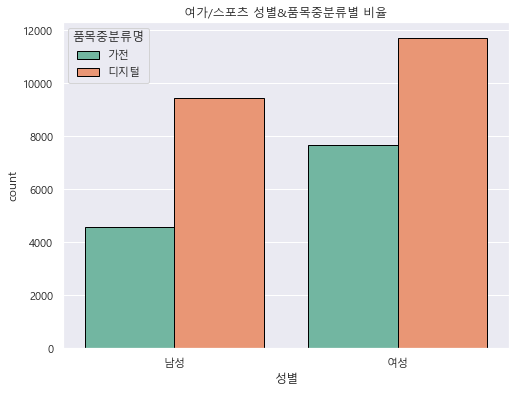

In [29]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
sns.countplot(x = '성별', data = data_j, edgecolor= 'black', palette='Set2', hue = '품목중분류명',order=group_names)

ax.set_title('전자 성별&품목중분류별 비율')
plt.show()

#남성이 문화를 즐기는게 낮음

C:\Users\dudtj\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


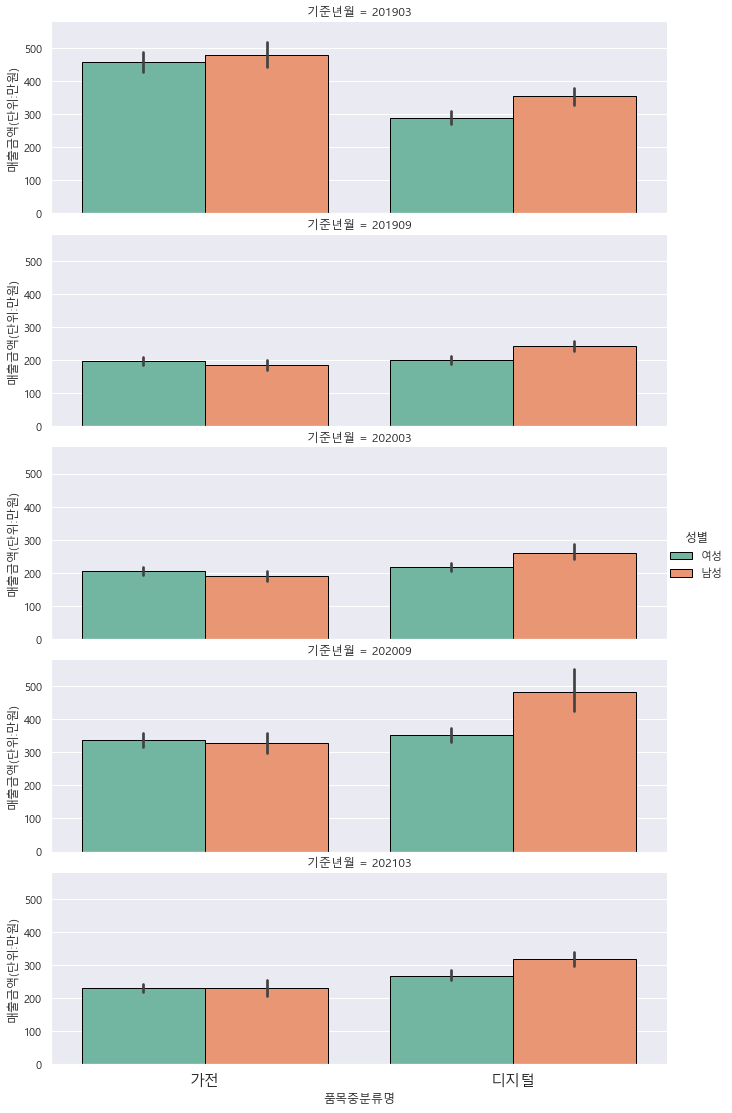

In [30]:
f=sns.factorplot(x = '품목중분류명',y = '매출금액(단위:만원)', data = data_j, edgecolor= 'black', palette='Set2', \
    hue = '성별', row = '기준년월', kind = 'bar', aspect = 2)
f.fig.set_size_inches(10, 15)
f.set_xticklabels(['가전','디지털'], fontsize= 15)
plt.show()

C:\Users\dudtj\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


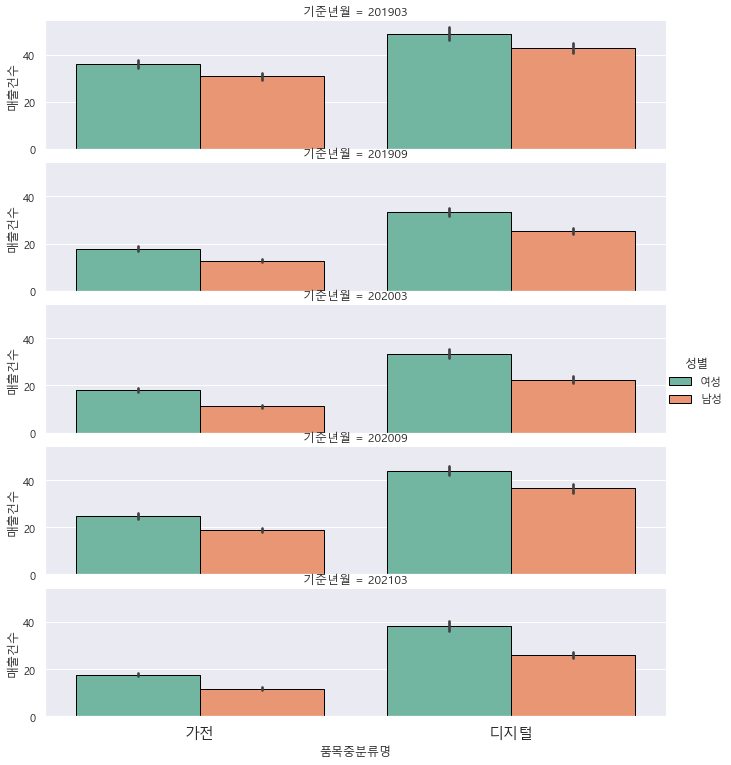

In [31]:
f=sns.factorplot(x = '품목중분류명',y = '매출건수', data = data_j, edgecolor= 'black', palette='Set2', hue = '성별', row = '기준년월', kind = 'bar', aspect = 2)
f.fig.set_size_inches(10, 10)
f.set_xticklabels(['가전','디지털'], fontsize= 15)
plt.show()

C:\Users\dudtj\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


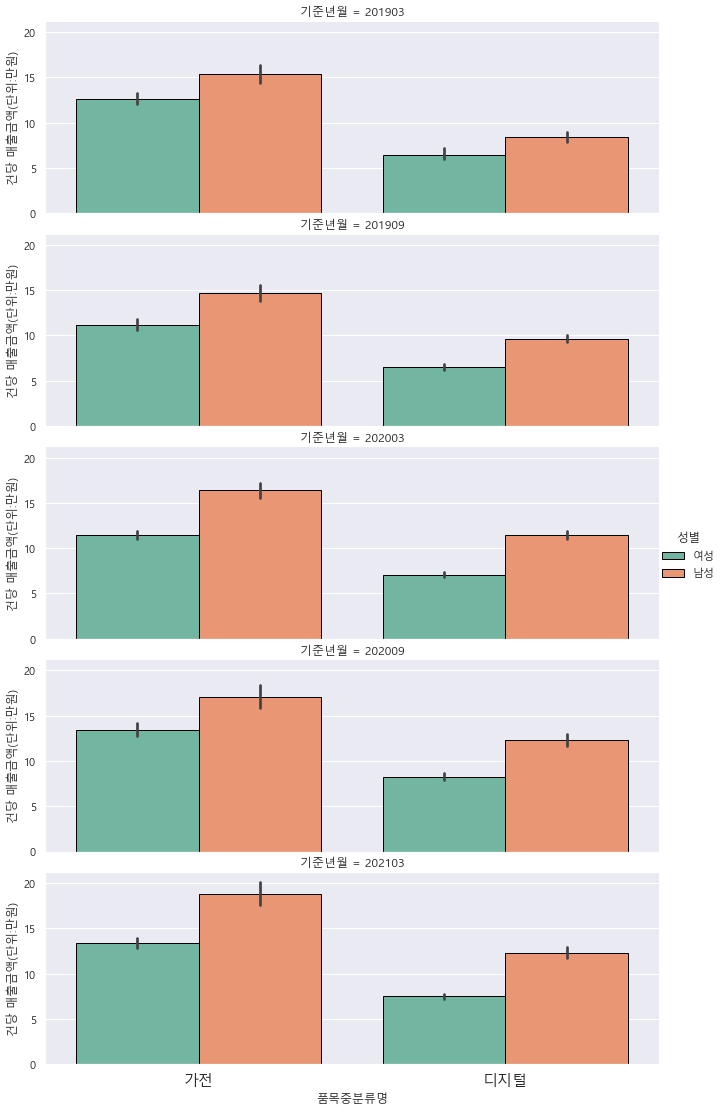

In [33]:
f=sns.factorplot(x = '품목중분류명',y = '건당 매출금액(단위:만원)', data = data_j, edgecolor= 'black', palette='Set2', hue = '성별', row = '기준년월', kind = 'bar', aspect = 2)
f.fig.set_size_inches(10, 15)
f.set_xticklabels(['가전','디지털'], fontsize= 15)
plt.show()

C:\Users\dudtj\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


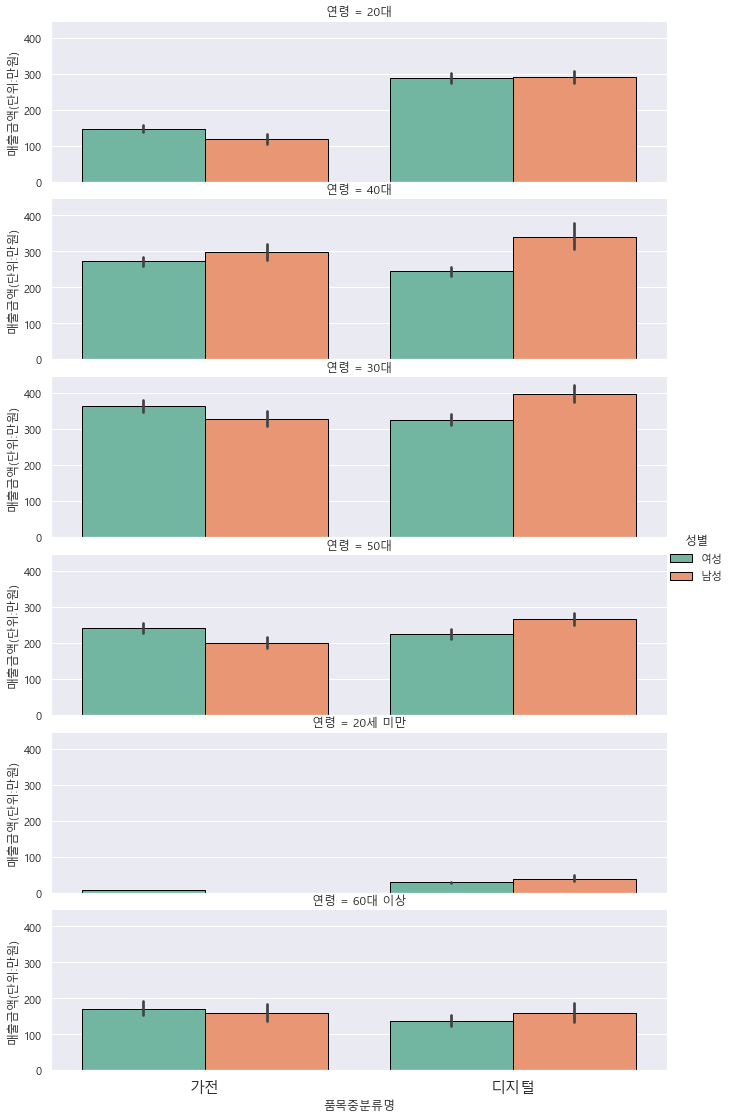

In [35]:
f=sns.factorplot(x = '품목중분류명',y = '매출금액(단위:만원)', data = data_j, edgecolor= 'black', palette='Set2', hue = '성별', row = '연령', kind = 'bar', aspect = 2)
f.fig.set_size_inches(10, 15)
f.set_xticklabels(['가전','디지털'], fontsize= 15)
plt.show()

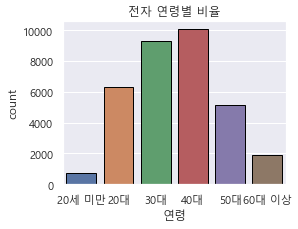

In [36]:
#여가/스포츠 연령별 건수 비율
group_names = ['20세 미만', '20대', '30대', '40대', '50대', '60대 이상']
fig, ax = plt.subplots(1, 1, figsize = (4,3))
sns.countplot(x = '연령', data = data_j, edgecolor = 'black', order=group_names)
ax.set_title('전자 연령별 비율')
plt.show()

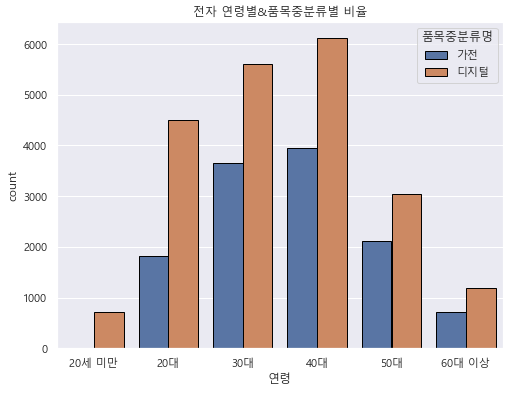

In [37]:
fig, ax = plt.subplots(1, 1, figsize = (8,6))
sns.countplot(x = '연령', data = data_j, edgecolor= 'black', hue = '품목중분류명', order=group_names)
ax.set_title('전자 연령별&품목중분류별 비율')
plt.show()

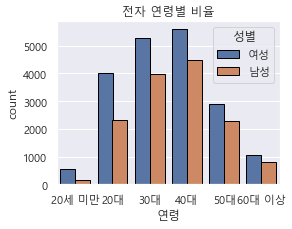

In [38]:
#전자 성별&연령별 건수 비율
fig, ax = plt.subplots(1, 1, figsize = (4 ,3))
sns.countplot(x = '연령', data = data_j, hue = '성별', edgecolor = 'black', order=group_names)
ax.set_title('전자 연령별 비율')
plt.show()

In [40]:
data_j['고객소재지_광역시도'].value_counts()
#사람수는 경기도가 인천보다 2배이상 많음

서울특별시    19596
경기도       9266
인천광역시     4586
Name: 고객소재지_광역시도, dtype: int64

In [39]:
data_j['매출건수'].groupby(data_j['고객소재지_광역시도']).sum()
#사람 수 대비 매출건수는 인천이 더 많음 

고객소재지_광역시도
경기도      224513
서울특별시    598522
인천광역시    136913
Name: 매출건수, dtype: int64

In [41]:
data_j['매출건수'].groupby(data_j['고객소재지_광역시도']).mean()

고객소재지_광역시도
경기도      24.229765
서울특별시    30.543070
인천광역시    29.854557
Name: 매출건수, dtype: float64

In [42]:
data_j['매출금액(단위:만원)'].groupby(data_j['고객소재지_광역시도']).mean()

고객소재지_광역시도
경기도      234.719629
서울특별시    298.581529
인천광역시    271.221227
Name: 매출금액(단위:만원), dtype: float64

In [43]:
data_j['건당 매출금액(단위:만원)'].groupby(data_j['고객소재지_광역시도']).mean()

고객소재지_광역시도
경기도      10.629946
서울특별시    10.897758
인천광역시     9.995709
Name: 건당 매출금액(단위:만원), dtype: float64

Text(0.5, 1.0, '광역시도별 건당 매출금액 평균')

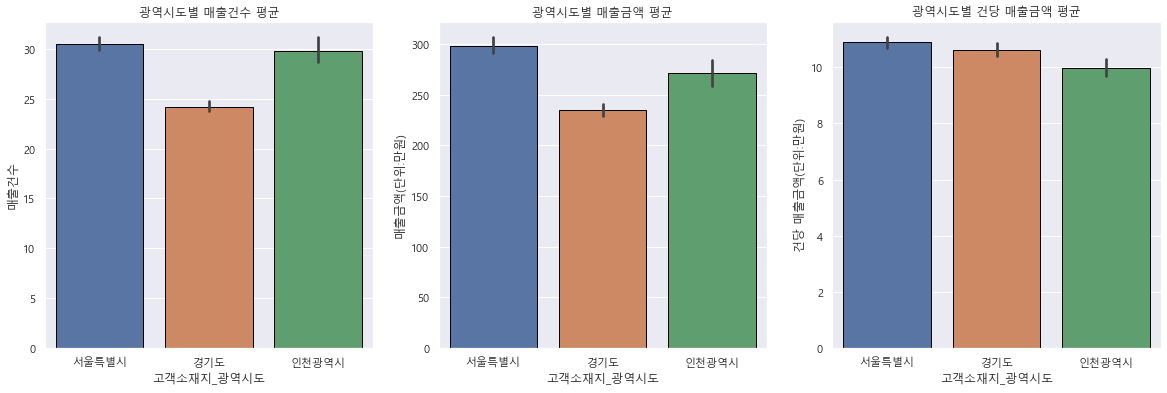

In [44]:
#위 사실을 조금 더 명확하게 확인하기 위해 시각화

#매출건수 평균 baplot
fig, ax = plt.subplots(figsize = (20, 6), ncols= 3)
sns.barplot(x = '고객소재지_광역시도', y = '매출건수', data = data_j, ax = ax[0], edgecolor = 'black')
ax[0].set_title('광역시도별 매출건수 평균')

#매출금액 평균 barplot
sns.barplot(x = '고객소재지_광역시도', y = '매출금액(단위:만원)', data = data_j, ax = ax[1], edgecolor = 'black')
ax[1].set_title('광역시도별 매출금액 평균')

#건당 매출금액 평균 barplot
sns.barplot(x = '고객소재지_광역시도', y = '건당 매출금액(단위:만원)', data = data_j, ax = ax[2], edgecolor = 'black')
ax[2].set_title('광역시도별 건당 매출금액 평균')

In [ ]:
data_j['고객소재지_광역시도'].value_counts()

Text(0, 0.5, '광역시도별 결제건수 = 사람수')

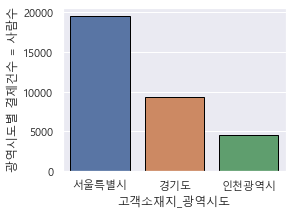

In [45]:
#반면에 인천의 사람 수는 훨씬 적음
fig, ax = plt.subplots(1, 1, figsize = (4 ,3))
sns.countplot(x = '고객소재지_광역시도', data = data_j, edgecolor = 'black')
ax.set_ylabel('광역시도별 결제건수 = 사람수')


### 결론 : 경기도 사람이 인천 & 서울시보다 여가/스포츠에 쓰는 돈도 적음

### 생각보다 인천광역시 사람들이 여가/스포츠에 쓰는 돈이 많다.

In [46]:
### 지역(구)에 따라서 중분류의 차이 비교하기 ###

data_j_Seoul = data_j[data_j['고객소재지_광역시도'] == '서울특별시']
df1 = pd.DataFrame(data_j_Seoul['고객소재지_시군구'].value_counts())
df1.sort_values(by = ['고객소재지_시군구'], axis=0, inplace=True)
df1.reset_index(inplace=True)
df1.rename(columns={'index' : '고객소재지_시군구', '고객소재지_시군구' : '합계'}, inplace=True)
df1

,고객소재지_시군구,합계
0,중구,319
1,금천구,366
2,종로구,407
3,관악구,419
4,강북구,424
5,도봉구,466
6,양천구,478
7,중랑구,656
8,노원구,657
9,광진구,700


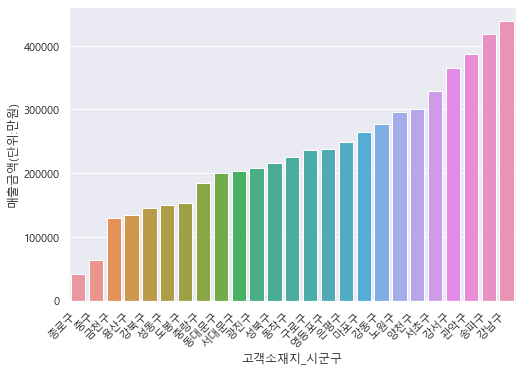

In [47]:
df = pd.DataFrame(data_j_Seoul['매출금액(단위:만원)'].groupby(data_j_Seoul['고객소재지_시군구']).sum())
df.reset_index(inplace=True)
df.sort_values(by = '매출금액(단위:만원)', axis = 0, inplace= True)
fig, ax = plt.subplots(1, 1, figsize = (8 ,6))
sns.barplot(x = '고객소재지_시군구', y = '매출금액(단위:만원)', data= df)
fig.autofmt_xdate(rotation = 45)

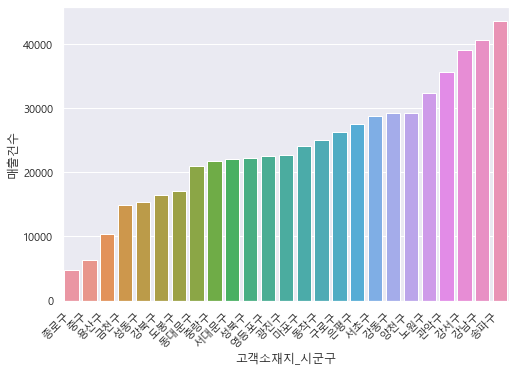

In [48]:
df = pd.DataFrame(data_j_Seoul['매출건수'].groupby(data_j_Seoul['고객소재지_시군구']).sum())
df.reset_index(inplace=True)
df.sort_values(by = '매출건수', axis = 0, inplace= True)
fig, ax = plt.subplots(1, 1, figsize = (8 ,6))
sns.barplot(x = '고객소재지_시군구', y = '매출건수', data= df)
fig.autofmt_xdate(rotation = 45)

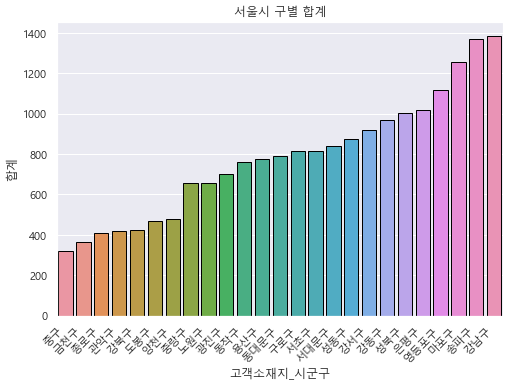

In [49]:
fig, ax = plt.subplots(1, 1, figsize = (8 ,6))
sns.barplot(x = '고객소재지_시군구', y = '합계',data = df1, edgecolor = 'black')
ax.set_title('서울시 구별 합계')

fig.autofmt_xdate(rotation = 45)
plt.show()

In [51]:
###매출금액 평균도 비교하기 ###
df = pd.DataFrame(data_j_Seoul['매출금액(단위:만원)'].groupby(data_j_Seoul['고객소재지_시군구']).mean())
df.sort_values(by = ['매출금액(단위:만원)'], inplace=True)
df.reset_index(inplace=True)

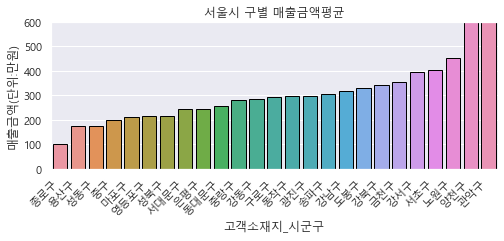

In [52]:
fig, ax = plt.subplots(1, 1, figsize = (8,3))
sns.barplot(x = '고객소재지_시군구', y = '매출금액(단위:만원)',data = df, edgecolor = 'black')
ax.set_title('서울시 구별 매출금액평균')
ax.set(ylim = [0, 600])
fig.autofmt_xdate(rotation = 45)
plt.show()

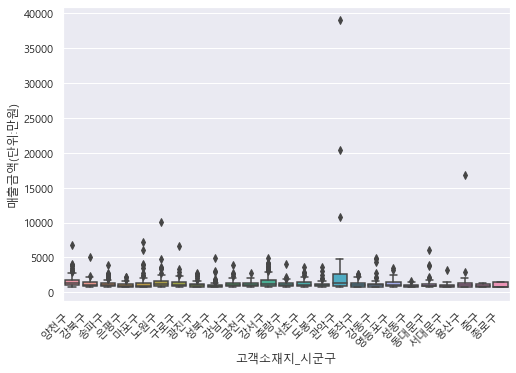

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액(단위:만원),매출건수,건당 매출금액(단위:만원)
81,201903,15,전자,1510,가전,여성,40대,초중고자녀가구,서울특별시,양천구,목동,2571.7452,167,15.399672
82,201903,15,전자,1511,디지털,남성,40대,초중고자녀가구,서울특별시,양천구,목동,1952.8688,196,9.963616
136,201903,15,전자,1511,디지털,남성,40대,초중고자녀가구,서울특별시,강북구,번동,777.1629,42,18.503879
293,201903,15,전자,1511,디지털,여성,40대,초중고자녀가구,서울특별시,송파구,가락동,1160.0755,92,12.609516
302,201903,15,전자,1511,디지털,여성,30대,신혼영유아가구,서울특별시,송파구,가락동,1057.0983,171,6.181861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516560,202103,15,전자,1511,디지털,남성,50대,성인자녀가구,서울특별시,관악구,신림동,1192.0633,124,9.613414
516755,202103,15,전자,1511,디지털,남성,30대,신혼영유아가구,서울특별시,구로구,오류동,1416.1077,52,27.232840
517116,202103,15,전자,1511,디지털,여성,30대,신혼영유아가구,서울특별시,광진구,중곡동,1148.8795,162,7.091849
517944,202103,15,전자,1510,가전,남성,40대,신혼영유아가구,서울특별시,영등포구,대림동,765.3982,14,54.671300


In [53]:
def cut_point(quanti, data):
    a = quanti
    cut_po=data['매출금액(단위:만원)'].quantile(a)
    df_cut=data[data['매출금액(단위:만원)'] > cut_po]
    fig, ax = plt.subplots(1, 1, figsize = (8 ,6))
    sns.boxplot(x = '고객소재지_시군구', y = '매출금액(단위:만원)', data = df_cut)
    fig.autofmt_xdate(rotation = 45)
    plt.show()
    return df_cut

cut_point(0.90, data_j_Seoul)

In [54]:
## 건당 매출금액 ##
df = pd.DataFrame(data_j_Seoul['건당 매출금액(단위:만원)'].groupby(data_j_Seoul['고객소재지_시군구']).mean())
df.sort_values(by = ['건당 매출금액(단위:만원)'], inplace=True)
df.reset_index(inplace=True)

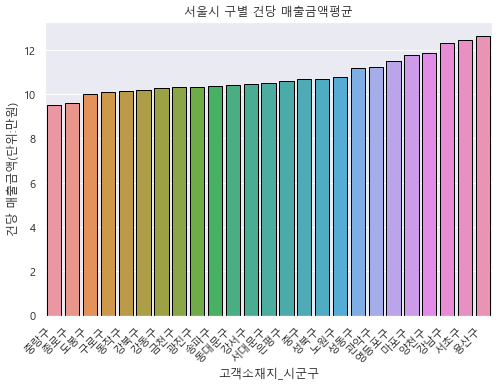

In [55]:
fig, ax = plt.subplots(1, 1, figsize = (8 ,6))
sns.barplot(x = '고객소재지_시군구', y = '건당 매출금액(단위:만원)',data = df, edgecolor = 'black')
ax.set_title('서울시 구별 건당 매출금액평균')
fig.autofmt_xdate(rotation = 45)
plt.show()


In [56]:
data_j_Gyeong = data_j[data_j['고객소재지_광역시도'] == '경기도']
data_j_Incheon = data_j[data_j['고객소재지_광역시도'] == '인천광역시']

Text(0.5, 1.0, '인천광역시 품목중분류')

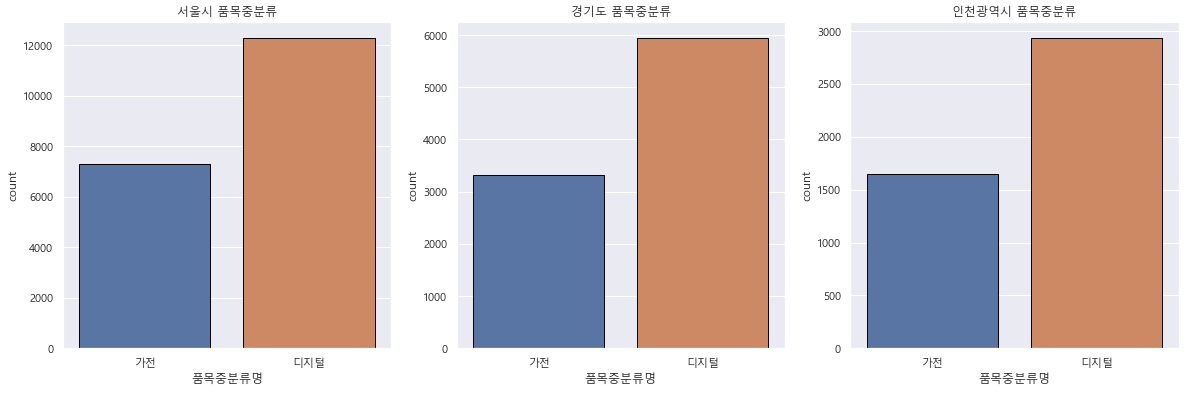

In [58]:
fig, ax = plt.subplots(figsize = (20, 6), ncols= 3)
group_names = ['가전','디지털']

#서울시 중분류
sns.countplot(x = '품목중분류명', data = data_j_Seoul, ax = ax[0], edgecolor = 'black', order=group_names)
ax[0].set_title('서울시 품목중분류')

#경기도 중분류
sns.countplot(x = '품목중분류명', data = data_j_Gyeong, ax = ax[1], edgecolor = 'black', order=group_names)
ax[1].set_title('경기도 품목중분류')

#인천광역시 중분류
sns.countplot(x = '품목중분류명', data = data_j_Incheon, ax = ax[2], edgecolor = 'black', order= group_names)
ax[2].set_title('인천광역시 품목중분류')

In [59]:
data_j_Seoul.sort_values(by = ['성별'],inplace=True)
data_j_Gyeong.sort_values(by = ['성별'], inplace=True)
data_j_Incheon.sort_values(by = ['성별'], inplace=True)

<ipython-input-59-56cf7a7a9737>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Seoul.sort_values(by = ['성별'],inplace=True)
<ipython-input-59-56cf7a7a9737>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Gyeong.sort_values(by = ['성별'], inplace=True)
<ipython-input-59-56cf7a7a9737>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Incheon.sort_values(by = ['성별'], inplace=True)


Text(0.5, 1.0, '인천광역시 품목중분류')

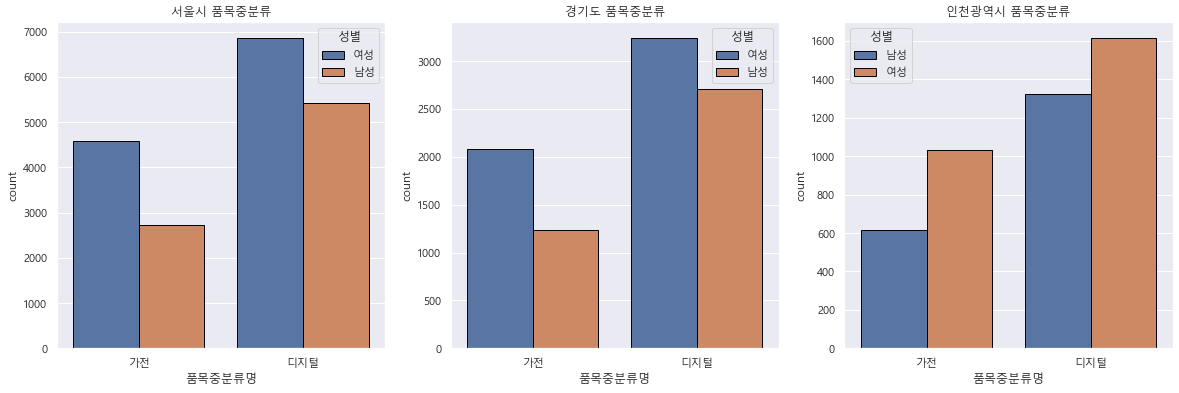

In [64]:
#지역 & 성별
#서울시 중분류
fig, ax = plt.subplots(figsize = (20, 6), ncols= 3)
group_names = ['가전','디지털']
sns.countplot(x = '품목중분류명', data = data_j_Seoul, ax = ax[0],edgecolor = 'black', order=group_names, hue = '성별')
ax[0].set_title('서울시 품목중분류')

#경기도 중분류
sns.countplot(x = '품목중분류명', data = data_j_Gyeong, ax = ax[1],edgecolor = 'black', order=group_names,hue = '성별')
ax[1].set_title('경기도 품목중분류')

#인천광역시 중분류
sns.countplot(x = '품목중분류명', data = data_j_Incheon, ax = ax[2], edgecolor = 'black', order= group_names, hue = '성별')
ax[2].set_title('인천광역시 품목중분류')


#도시별 패턴이 비슷

<ipython-input-65-5d7c8a0d4e26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Seoul.sort_values(by = ['연령'], inplace=True)
<ipython-input-65-5d7c8a0d4e26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Gyeong.sort_values(by = ['연령'], inplace=True)
<ipython-input-65-5d7c8a0d4e26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Incheon.sort_values(by = ['연령'], inplace=True)


Text(0.5, 1.0, '인천광역시 품목중분류')

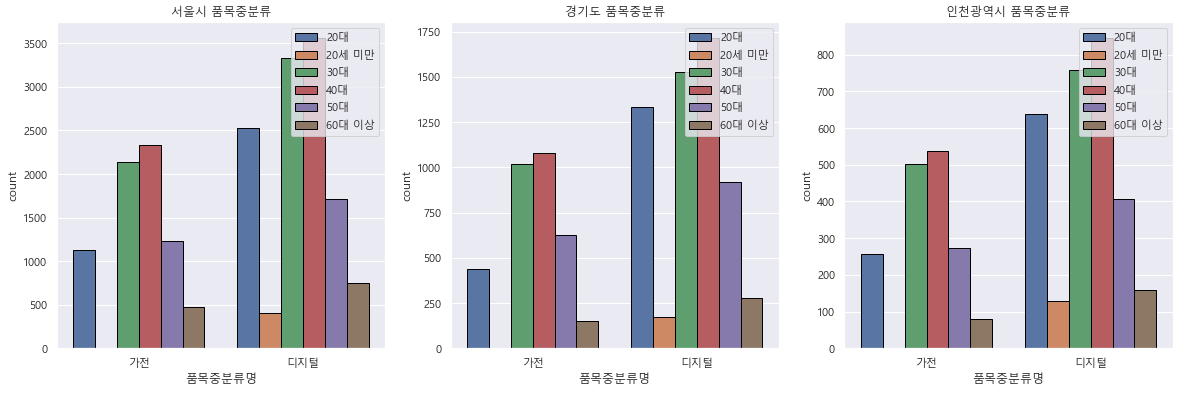

In [65]:
#지역 & 연령
data_j_Seoul.sort_values(by = ['연령'], inplace=True)
data_j_Gyeong.sort_values(by = ['연령'], inplace=True)
data_j_Incheon.sort_values(by = ['연령'], inplace=True)

#서울시 중분류
fig, ax = plt.subplots(figsize = (20, 6), ncols= 3)
sns.countplot(x = '품목중분류명', data = data_j_Seoul, ax = ax[0],edgecolor = 'black', order=group_names, hue = '연령')
ax[0].legend(loc = 'upper right')
ax[0].set_title('서울시 품목중분류')

#경기도 중분류
sns.countplot(x = '품목중분류명', data = data_j_Gyeong, ax = ax[1],edgecolor = 'black', order=group_names,hue = '연령')
ax[1].legend(loc = 'upper right')
ax[1].set_title('경기도 품목중분류')

#인천광역시 중분류
sns.countplot(x = '품목중분류명', data = data_j_Incheon, ax = ax[2], edgecolor = 'black', order= group_names, hue = '연령')
ax[2].legend(loc = 'upper right')
ax[2].set_title('인천광역시 품목중분류')

In [66]:
#지역 & 가구
data_j_Seoul.sort_values(by = ['가구생애주기'], inplace=True)
data_j_Gyeong.sort_values(by = ['가구생애주기'], inplace=True)
data_j_Incheon.sort_values(by = ['가구생애주기'], inplace=True)

<ipython-input-66-9d915ee4b25e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Seoul.sort_values(by = ['가구생애주기'], inplace=True)
<ipython-input-66-9d915ee4b25e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Gyeong.sort_values(by = ['가구생애주기'], inplace=True)
<ipython-input-66-9d915ee4b25e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Incheon.sort_values(by = ['가구생애주기'], inplace=True)


In [68]:
data_j['가구생애주기'].groupby(data_j['고객소재지_광역시도']).value_counts()

#조금 더 보기 쉽게 시각화

고객소재지_광역시도  가구생애주기 
경기도         신혼영유아가구    3144
            초중고자녀가구    2163
            1인가구       1936
            성인자녀가구     1591
            노인가구        432
서울특별시       신혼영유아가구    6521
            1인가구       4981
            초중고자녀가구    3664
            성인자녀가구     3209
            노인가구       1221
인천광역시       신혼영유아가구    1434
            초중고자녀가구    1070
            1인가구       1015
            성인자녀가구      827
            노인가구        240
Name: 가구생애주기, dtype: int64

Text(0.5, 1.0, '지역 & 가구생애주기')

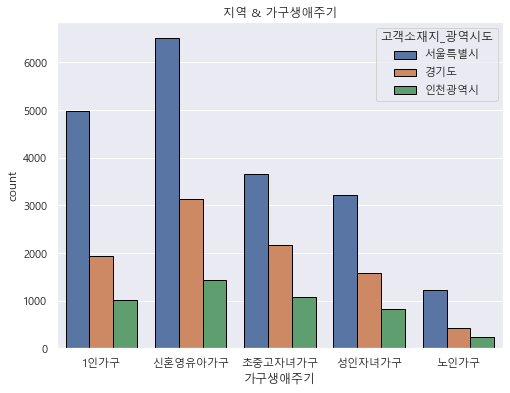

In [69]:
fig, ax = plt.subplots(1, 1, figsize = (8 ,6))
sns.countplot(x = '가구생애주기', data = data_j, edgecolor = 'black', hue = '고객소재지_광역시도')
ax.set_title('지역 & 가구생애주기')

Text(0.5, 1.0, '인천광역시 가구생애주기')

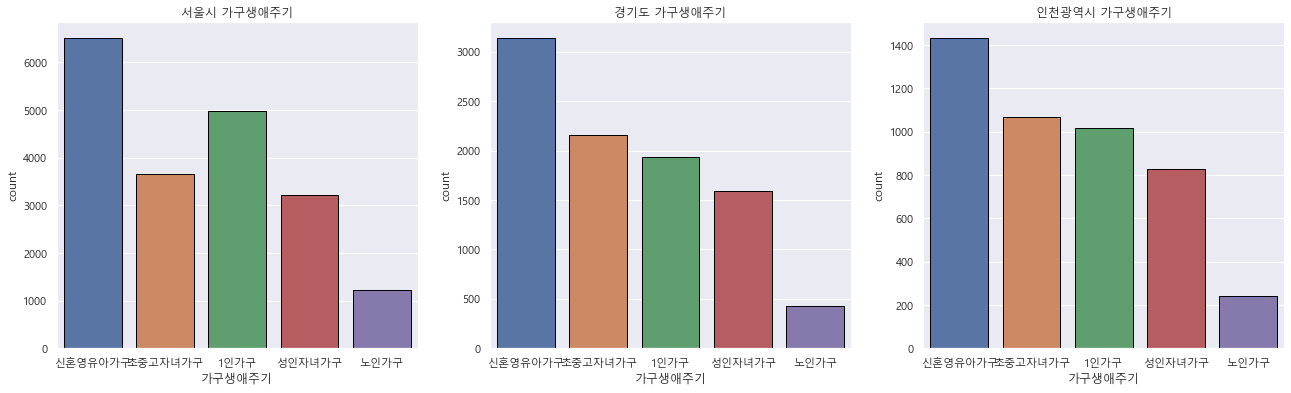

In [70]:
#도시별 가구생애주기
fig, ax = plt.subplots(figsize = (22, 6), ncols= 3)
group_names = ['신혼영유아가구','초중고자녀가구', '1인가구', '성인자녀가구', '노인가구']
sns.countplot(x = '가구생애주기', data = data_j_Seoul, ax = ax[0], edgecolor = 'black', order=group_names)
ax[0].set_title('서울시 가구생애주기')

#경기도 중분류
sns.countplot(x = '가구생애주기', data = data_j_Gyeong, ax = ax[1], edgecolor = 'black', order=group_names)
ax[1].set_title('경기도 가구생애주기')

#인천광역시 중분류
sns.countplot(x = '가구생애주기', data = data_j_Incheon, ax = ax[2], edgecolor = 'black', order=group_names)
ax[2].set_title('인천광역시 가구생애주기')


#서울시가 1인가구가 많음

In [71]:
data_j['기준년월'].groupby(data_j['고객소재지_광역시도']).value_counts()

고객소재지_광역시도  기준년월  
경기도         202003    2433
            202103    2200
            201909    1989
            202009    1400
            201903    1244
서울특별시       202003    5143
            202103    4467
            201909    4159
            202009    3064
            201903    2763
인천광역시       202003    1198
            202103    1074
            201909     966
            202009     710
            201903     638
Name: 기준년월, dtype: int64

In [76]:
def get_M(feature):
    #데이터 정렬
    data_j_Seoul.sort_values(by = [feature], inplace=True)
    data_j_Gyeong.sort_values(by = [feature], inplace=True)
    data_j_Incheon.sort_values(by = [feature], inplace=True)

    #빈도수체크
    print(data_j[feature].groupby(data_j['고객소재지_광역시도']).value_counts())

    #서울시 중분류
    fig, ax = plt.subplots(figsize = (22, 6), ncols= 3)
    group_names = ['가전','디지털']
    sns.countplot(x = '품목중분류명', data = data_j_Seoul, ax = ax[0],edgecolor = 'black', order=group_names, hue = feature)
    ax[0].legend(loc = 'upper right')
    ax[0].set_title('서울시 품목중분류')

    #경기도 중분류
    sns.countplot(x = '품목중분류명', data = data_j_Gyeong, ax = ax[1],edgecolor = 'black', order=group_names,hue = feature)
    ax[1].legend(loc = 'upper right')
    ax[1].set_title('경기도 품목중분류')

    #인천광역시 중분류
    sns.countplot(x = '품목중분류명', data = data_j_Incheon, ax = ax[2], edgecolor = 'black', order= group_names, hue = feature)
    ax[2].legend(loc = 'upper right')
    ax[2].set_title('인천광역시 품목중분류')

<ipython-input-76-e01ad5c80b9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Seoul.sort_values(by = [feature], inplace=True)
<ipython-input-76-e01ad5c80b9f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Gyeong.sort_values(by = [feature], inplace=True)
<ipython-input-76-e01ad5c80b9f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Incheon.sort_values(by = [feature], inplace=True)


고객소재지_광역시도  가구생애주기 
경기도         신혼영유아가구    3144
            초중고자녀가구    2163
            1인가구       1936
            성인자녀가구     1591
            노인가구        432
서울특별시       신혼영유아가구    6521
            1인가구       4981
            초중고자녀가구    3664
            성인자녀가구     3209
            노인가구       1221
인천광역시       신혼영유아가구    1434
            초중고자녀가구    1070
            1인가구       1015
            성인자녀가구      827
            노인가구        240
Name: 가구생애주기, dtype: int64


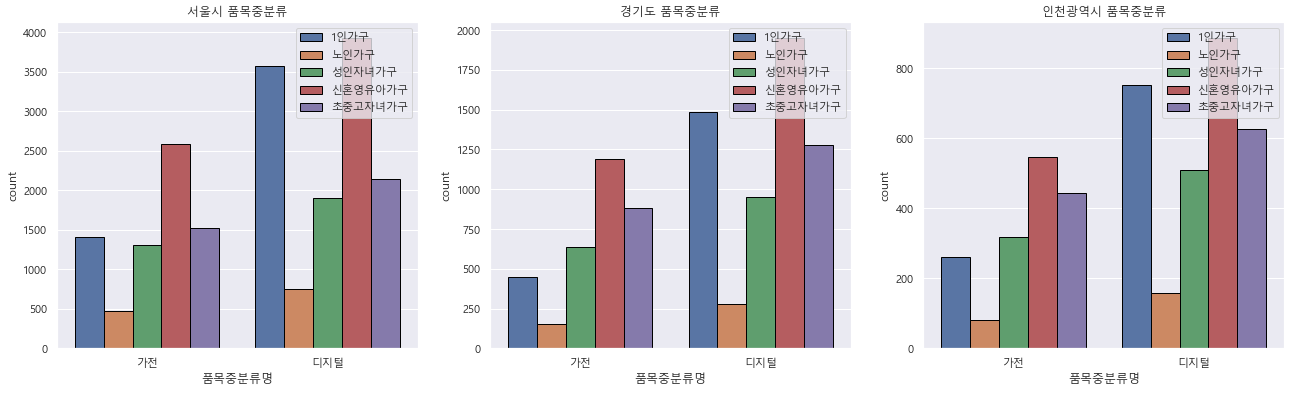

In [77]:
get_M('가구생애주기')

<ipython-input-76-e01ad5c80b9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Seoul.sort_values(by = [feature], inplace=True)
<ipython-input-76-e01ad5c80b9f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Gyeong.sort_values(by = [feature], inplace=True)
<ipython-input-76-e01ad5c80b9f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Incheon.sort_values(by = [feature], inplace=True)


고객소재지_광역시도  기준년월  
경기도         202003    2433
            202103    2200
            201909    1989
            202009    1400
            201903    1244
서울특별시       202003    5143
            202103    4467
            201909    4159
            202009    3064
            201903    2763
인천광역시       202003    1198
            202103    1074
            201909     966
            202009     710
            201903     638
Name: 기준년월, dtype: int64


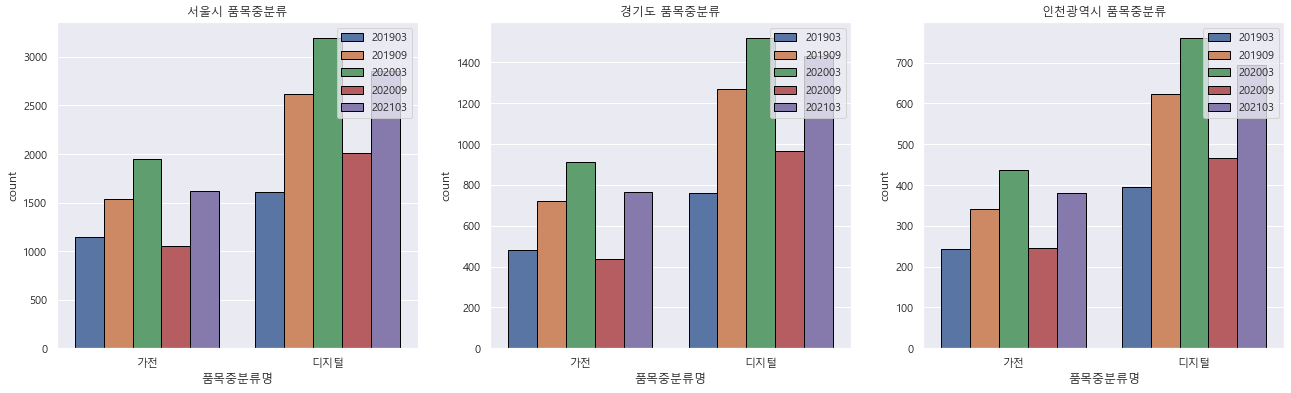

In [78]:
get_M('기준년월')

고객소재지_광역시도  품목중분류명
경기도         디지털        5950
            가전         3316
서울특별시       디지털       12297
            가전         7299
인천광역시       디지털        2937
            가전         1649
Name: 품목중분류명, dtype: int64


<ipython-input-79-adf553f69f89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Seoul.sort_values(by = ['품목중분류명'], inplace=True)
<ipython-input-79-adf553f69f89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Gyeong.sort_values(by = ['품목중분류명'], inplace=True)
<ipython-input-79-adf553f69f89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Incheon.sort_values(by = ['품목중분류명'], inplace=True)


Text(0.5, 1.0, '인천광역시 품목중분류')

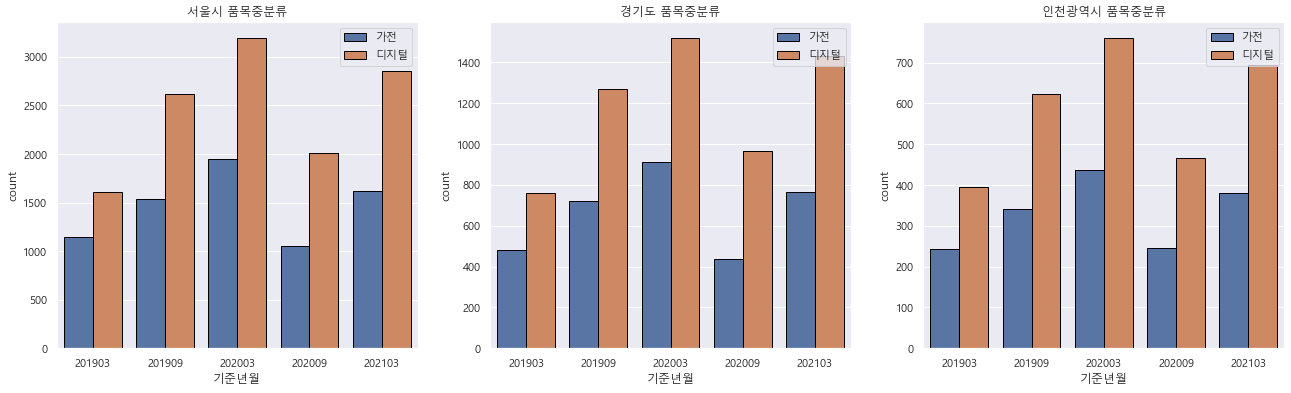

In [79]:
data_j_Seoul.sort_values(by = ['품목중분류명'], inplace=True)
data_j_Gyeong.sort_values(by = ['품목중분류명'], inplace=True)
data_j_Incheon.sort_values(by = ['품목중분류명'], inplace=True)

#빈도수체크
print(data_j['품목중분류명'].groupby(data_j['고객소재지_광역시도']).value_counts())

#서울시 중분류
fig, ax = plt.subplots(figsize = (22, 6), ncols= 3)
sns.countplot(x = '기준년월', data = data_j_Seoul, ax = ax[0],edgecolor = 'black', hue = '품목중분류명')
ax[0].legend(loc = 'upper right')
ax[0].set_title('서울시 품목중분류')

#경기도 중분류
sns.countplot(x = '기준년월', data = data_j_Gyeong, ax = ax[1],edgecolor = 'black',hue = '품목중분류명')
ax[1].legend(loc = 'upper right')
ax[1].set_title('경기도 품목중분류')

#인천광역시 중분류
sns.countplot(x = '기준년월', data = data_j_Incheon, ax = ax[2], edgecolor = 'black', hue = '품목중분류명')
ax[2].legend(loc = 'upper right')
ax[2].set_title('인천광역시 품목중분류')

<AxesSubplot:xlabel='기준년월', ylabel='count'>

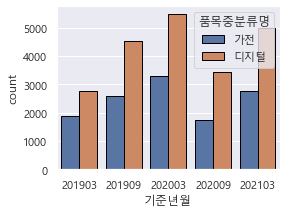

In [80]:
fig, ax = plt.subplots(1, 1, figsize = (4 ,3))
sns.countplot(x = '기준년월', data = data_j, hue = '품목중분류명',edgecolor = 'black')

In [83]:
def get_M_count(feature, feature2):
    #데이터 정렬
    data_j_Seoul.sort_values(by = [feature], inplace=True)
    data_j_Gyeong.sort_values(by = [feature], inplace=True)
    data_j_Incheon.sort_values(by = [feature], inplace=True)

    #빈도수체크
    print(data_j[feature].groupby(data_j['고객소재지_광역시도']).value_counts())

    #서울시 중분류
    fig, ax = plt.subplots(figsize = (22, 6), ncols= 3)
    group_names = data_j[feature2].unique().tolist()
    sns.countplot(x = feature2, data = data_j_Seoul, ax = ax[0],edgecolor = 'black', order= group_names,hue = feature)
    ax[0].legend(loc = 'upper right')
    ax[0].set_title('서울시 품목중분류')

    #경기도 중분류
    sns.countplot(x = feature2, data = data_j_Gyeong, ax = ax[1],edgecolor = 'black', order= group_names,hue = feature)
    ax[1].legend(loc = 'upper right')
    ax[1].set_title('경기도 품목중분류')

    #인천광역시 중분류
    sns.countplot(x = feature2, data = data_j_Incheon, ax = ax[2], edgecolor = 'black', order = group_names ,hue = feature)
    ax[2].legend(loc = 'upper right')
    ax[2].set_title('인천광역시 품목중분류')


#barplot를 통해 평균 시각화하는 함수
def get_M_bar(feature, feature2, y,ylim):
    #데이터 정렬
    data_j_Seoul.sort_values(by = [feature], inplace=True)
    data_j_Gyeong.sort_values(by = [feature], inplace=True)
    data_j_Incheon.sort_values(by = [feature], inplace=True)

    #빈도수체크
    print(data_j[y].groupby(data_j['고객소재지_광역시도']).mean())

    #서울시 중분류
    fig, ax = plt.subplots(figsize = (22, 6), ncols= 3)
    group_names = data_j[feature2].unique().tolist()
    sns.barplot(x = feature2, y = y, data = data_j_Seoul, ax = ax[0],edgecolor = 'black', order= group_names,hue = feature)
    ax[0].legend(loc = 'upper right')
    ax[0].set(ylim =ylim)
    ax[0].set_title('서울시 품목중분류')

    #경기도 중분류
    sns.barplot(x = feature2, y = y,data = data_j_Gyeong, ax = ax[1],edgecolor = 'black', order= group_names,hue = feature)
    ax[1].legend(loc = 'upper right')
    ax[1].set(ylim = ylim)
    ax[1].set_title('경기도 품목중분류')

    #인천광역시 중분류
    sns.barplot(x = feature2, y = y,data = data_j_Incheon, ax = ax[2], edgecolor = 'black', order = group_names ,hue = feature)
    ax[2].legend(loc = 'upper right')
    ax[2].set(ylim =ylim)
    ax[2].set_title('인천광역시 품목중분류')

def get_M_box(feature, feature2, y):
    #데이터 정렬
    data_j_Seoul.sort_values(by = [feature], inplace=True)
    data_j_Gyeong.sort_values(by = [feature], inplace=True)
    data_j_Incheon.sort_values(by = [feature], inplace=True)

    #빈도수체크
    print(data_j[y].groupby(data_j['고객소재지_광역시도']).mean())

    #서울시 중분류
    fig, ax = plt.subplots(figsize = (22, 6), ncols= 3)
    group_names = data_j[feature2].unique().tolist()
    sns.boxplot(x = feature2, y = y, data = data_j_Seoul, ax = ax[0], order= group_names,hue = feature)
    ax[0].legend(loc = 'upper right')
    ax[0].set_title('서울시 품목중분류')

    #경기도 중분류
    sns.boxplot(x = feature2, y = y,data = data_j_Gyeong, ax = ax[1], order= group_names,hue = feature)
    ax[1].legend(loc = 'upper right')
    ax[1].set_title('경기도 품목중분류')

    #인천광역시 중분류
    sns.boxplot(x = feature2, y = y,data = data_j_Incheon, ax = ax[2], order = group_names ,hue = feature)
    ax[2].legend(loc = 'upper right')
    ax[2].set_title('인천광역시 품목중분류')

<ipython-input-83-c0661dd1d4ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Seoul.sort_values(by = [feature], inplace=True)
<ipython-input-83-c0661dd1d4ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Gyeong.sort_values(by = [feature], inplace=True)
<ipython-input-83-c0661dd1d4ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Incheon.sort_values(by = [feature], inplace=True)


고객소재지_광역시도  품목중분류명
경기도         디지털        5950
            가전         3316
서울특별시       디지털       12297
            가전         7299
인천광역시       디지털        2937
            가전         1649
Name: 품목중분류명, dtype: int64


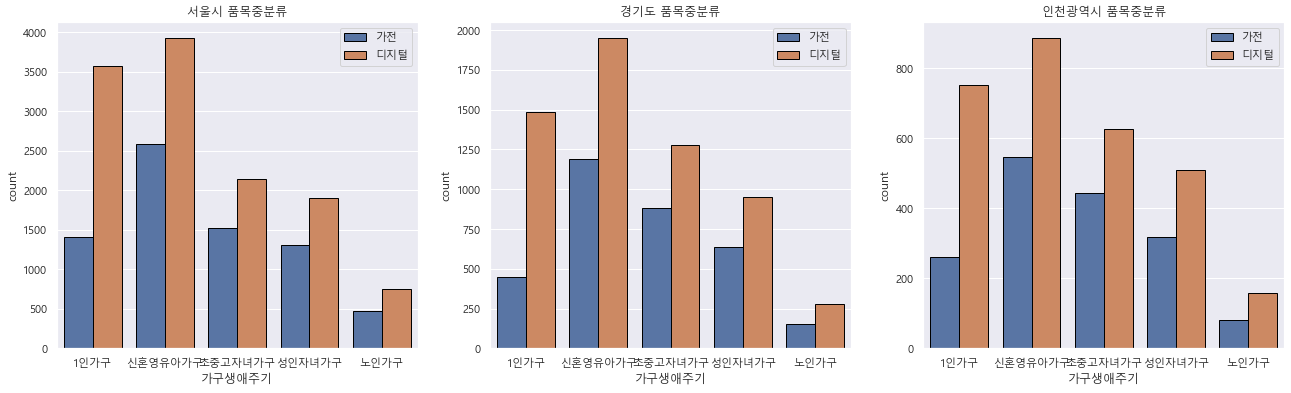

In [84]:
get_M_count('품목중분류명', '가구생애주기')

C:\Users\dudtj\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


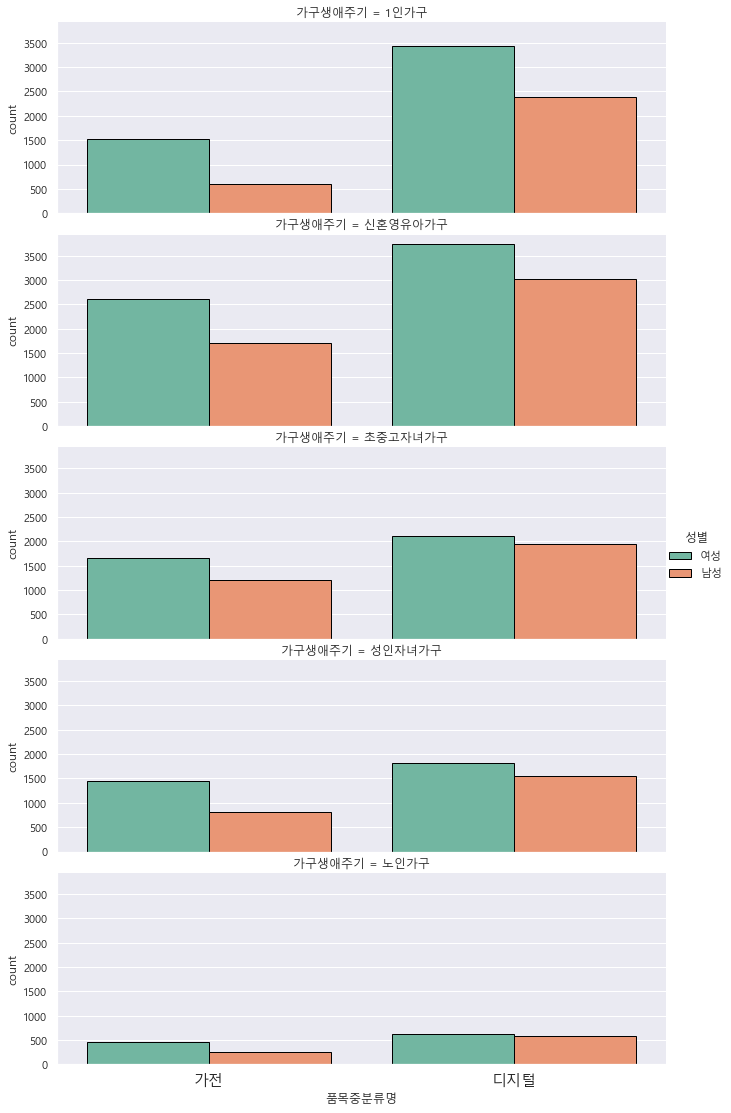

In [86]:
f=sns.factorplot(x = '품목중분류명', data = data_j, edgecolor= 'black', palette='Set2', hue = '성별', row = '가구생애주기', kind = 'count', aspect = 2)
f.fig.set_size_inches(10, 15)
f.set_xticklabels(['가전','디지털'], fontsize= 15)
plt.show()

<ipython-input-83-c0661dd1d4ad>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Seoul.sort_values(by = [feature], inplace=True)
<ipython-input-83-c0661dd1d4ad>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Gyeong.sort_values(by = [feature], inplace=True)
<ipython-input-83-c0661dd1d4ad>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Incheon.sort_values(by = [feature], inplace=True)


고객소재지_광역시도
경기도      234.719629
서울특별시    298.581529
인천광역시    271.221227
Name: 매출금액(단위:만원), dtype: float64


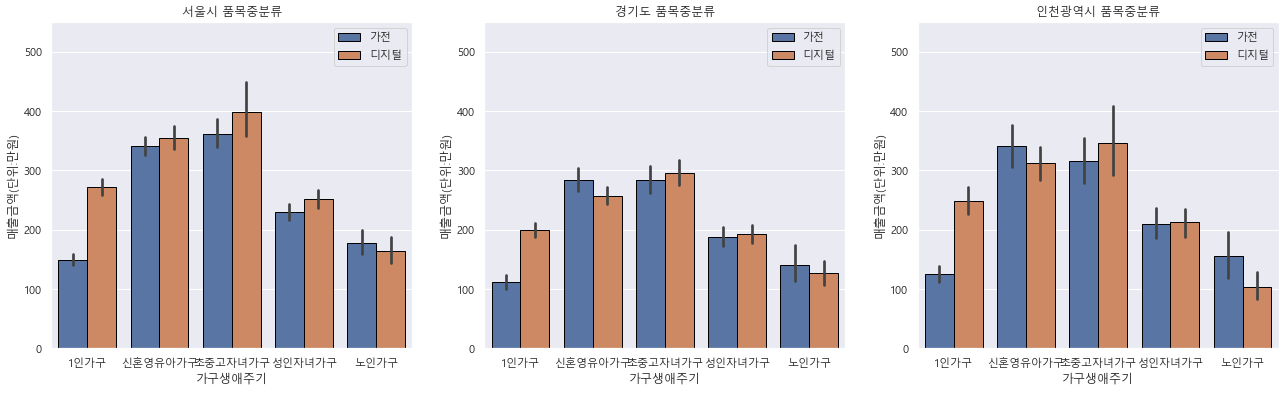

In [87]:
get_M_bar('품목중분류명', '가구생애주기', y = '매출금액(단위:만원)',ylim = [0, 550])


In [ ]:
# data_s_Seoul_Gwan = data_s_Seoul[data_s_Seoul['고객소재지_시군구'] == '관악구']
# data_s_Seoul_Gwan
# fig, ax = plt.subplots(1, 1, figsize = (8 ,6))
# group_names = ['노인가구', '초중고자녀가구', '성인자녀가구', '신혼영유아가구', '1인가구']
# ax.set(ylim = (0, 1000))
# sns.countplot(x = '가구생애주기', data= data_s_Seoul_Gwan, order=group_names)
# plt.title("관악구")

<AxesSubplot:title={'center':'성동구'}, xlabel='가구생애주기', ylabel='count'>

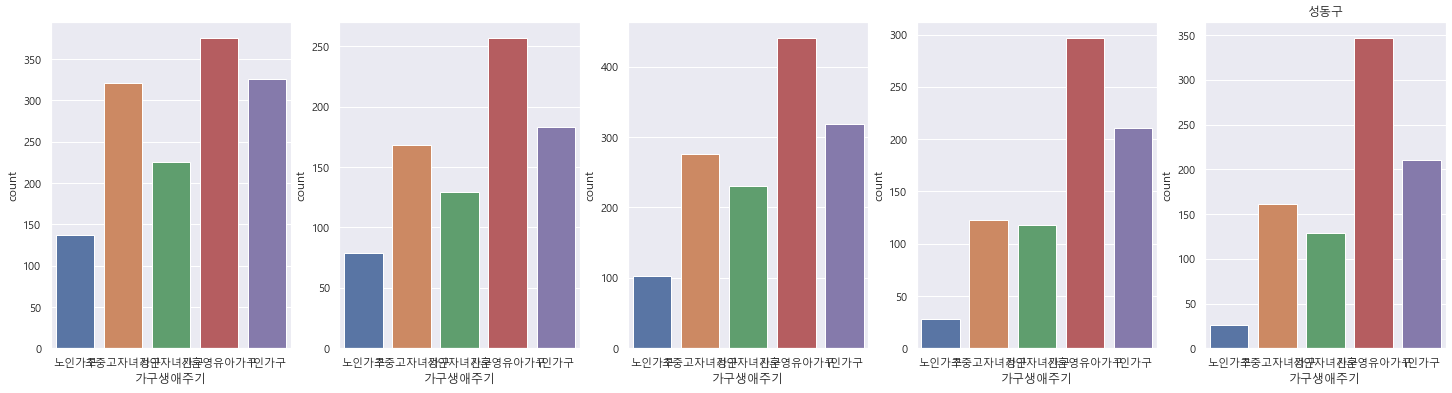

In [88]:
figure,((ax1,ax2,ax3,ax4,ax5))=plt.subplots(figsize=(25,6),nrows=1,ncols=5)
data_j_Seoul_GN = data_j_Seoul[data_j_Seoul['고객소재지_시군구'] == '강남구']
data_j_Seoul_GN
group_names = ['노인가구', '초중고자녀가구', '성인자녀가구', '신혼영유아가구', '1인가구']
ax.set(ylim = (0, 1000))
plt.title("강남구")
sns.countplot(x = '가구생애주기', data= data_j_Seoul_GN, order=group_names,ax=ax1)

data_j_Seoul_SC = data_j_Seoul[data_j_Seoul['고객소재지_시군구'] == '서초구']
data_j_Seoul_SC
group_names = ['노인가구', '초중고자녀가구', '성인자녀가구', '신혼영유아가구', '1인가구']
ax.set(ylim = (0, 1000))
plt.title("서초구")
sns.countplot(x = '가구생애주기', data= data_j_Seoul_SC, order=group_names,ax=ax2)


data_j_Seoul_SP = data_j_Seoul[data_j_Seoul['고객소재지_시군구'] == '송파구']
data_j_Seoul_SP
group_names = ['노인가구', '초중고자녀가구', '성인자녀가구', '신혼영유아가구', '1인가구']
ax.set(ylim = (0, 1000))
plt.title("송파구")
sns.countplot(x = '가구생애주기', data= data_j_Seoul_SP, order=group_names,ax=ax3)


data_j_Seoul_YS = data_j_Seoul[data_j_Seoul['고객소재지_시군구'] == '용산구']
data_j_Seoul_YS
group_names = ['노인가구', '초중고자녀가구', '성인자녀가구', '신혼영유아가구', '1인가구']
ax.set(ylim = (0, 1000))
plt.title("용산구")
sns.countplot(x = '가구생애주기', data= data_j_Seoul_YS, order=group_names,ax=ax4)


data_j_Seoul_SD = data_j_Seoul[data_j_Seoul['고객소재지_시군구'] == '성동구']
data_j_Seoul_SD
group_names = ['노인가구', '초중고자녀가구', '성인자녀가구', '신혼영유아가구', '1인가구']
ax.set(ylim = (0, 1000))
plt.title("성동구")
sns.countplot(x = '가구생애주기', data= data_j_Seoul_SD, order=group_names,ax=ax5)


<ipython-input-83-c0661dd1d4ad>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Seoul.sort_values(by = [feature], inplace=True)
<ipython-input-83-c0661dd1d4ad>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Gyeong.sort_values(by = [feature], inplace=True)
<ipython-input-83-c0661dd1d4ad>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Incheon.sort_values(by = [feature], inplace=True)


고객소재지_광역시도
경기도      10.629946
서울특별시    10.897758
인천광역시     9.995709
Name: 건당 매출금액(단위:만원), dtype: float64


<ipython-input-83-c0661dd1d4ad>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Seoul.sort_values(by = [feature], inplace=True)
<ipython-input-83-c0661dd1d4ad>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Gyeong.sort_values(by = [feature], inplace=True)
<ipython-input-83-c0661dd1d4ad>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Incheon.sort_values(by = [feature], inplace=True)


고객소재지_광역시도
경기도      24.229765
서울특별시    30.543070
인천광역시    29.854557
Name: 매출건수, dtype: float64


<ipython-input-83-c0661dd1d4ad>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Seoul.sort_values(by = [feature], inplace=True)
<ipython-input-83-c0661dd1d4ad>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Gyeong.sort_values(by = [feature], inplace=True)
<ipython-input-83-c0661dd1d4ad>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_j_Incheon.sort_values(by = [feature], inplace=True)


고객소재지_광역시도
경기도      234.719629
서울특별시    298.581529
인천광역시    271.221227
Name: 매출금액(단위:만원), dtype: float64


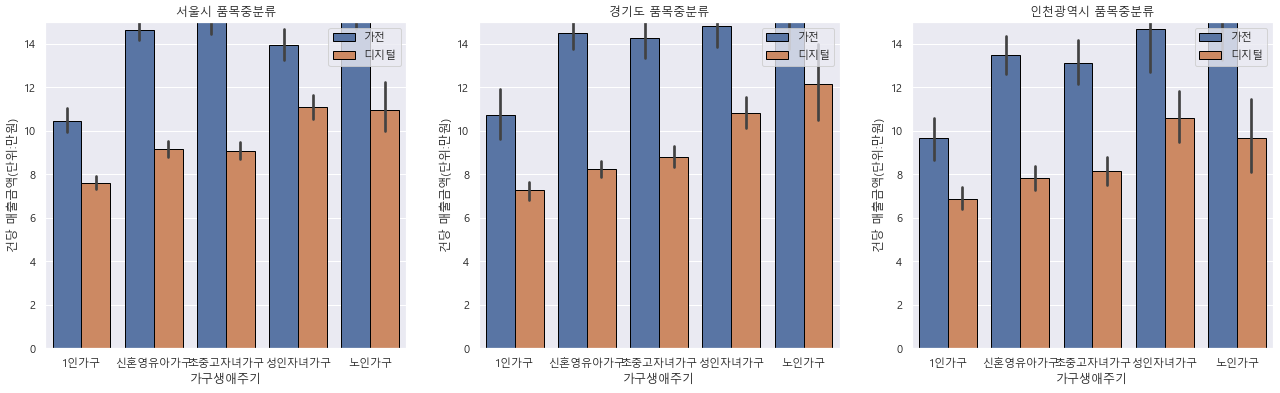

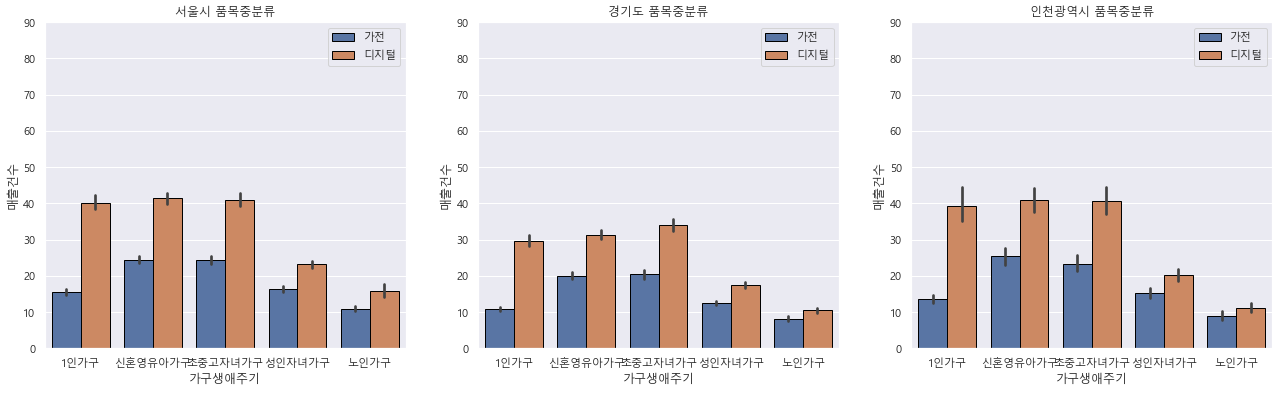

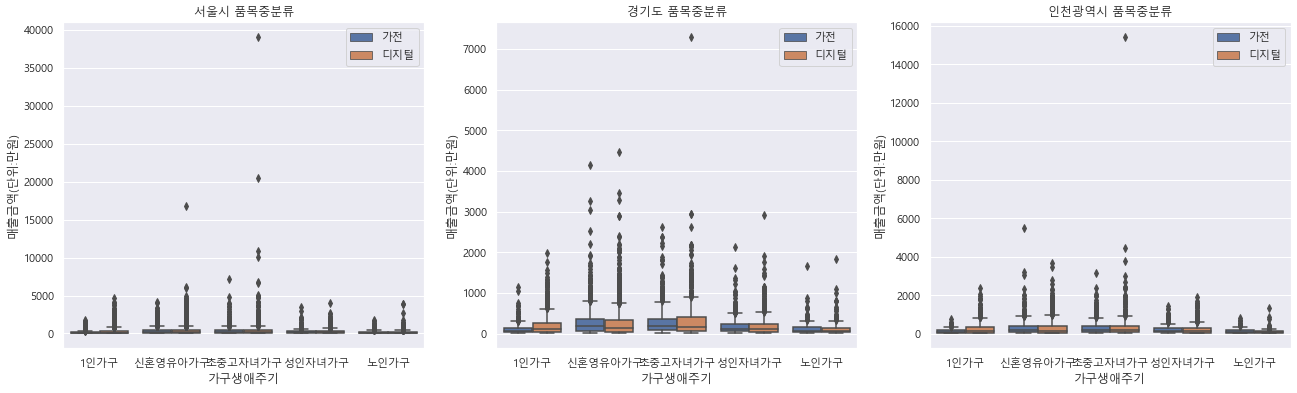

In [89]:
get_M_bar('품목중분류명', '가구생애주기', y = '건당 매출금액(단위:만원)',ylim=[0,15])
get_M_bar('품목중분류명', '가구생애주기', y = '매출건수',ylim = [0, 90])
get_M_box('품목중분류명', '가구생애주기', y = '매출금액(단위:만원)')